# Leech Trees

This appendix concerns a little corner of graph theory called Leech Trees. Before getting to that however
I needed to copy some instructional code on generating graphs. This code relis on NetworkX being installed
so it is actually three cells: The NetworkX install, a first example and a second example that is complete
    graphs I think.

In [1]:
!conda install networkx -y

Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/nbcommon/anaconda2_410:
#
networkx                  1.11                     py27_0  


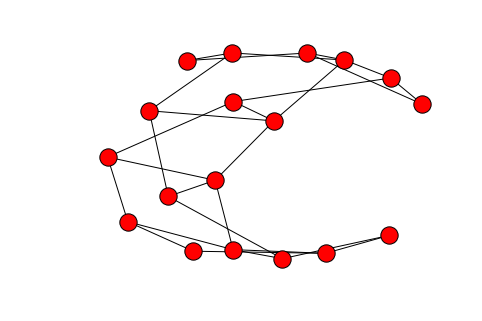

In [2]:
from operator import itemgetter
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout


def Kn(n):
    G = nx.Graph()
    a=range(n)
    G.add_nodes_from(a)
    Kn=[]
    for i in range(n-1):
        for j in range(n-i-1):
            k=j+i+1
            Kn.append((i,k))
    G.add_edges_from(Kn)
    return G

##print G.nodes()
##print G.edges()
##print G.number_of_nodes()
##print G.number_of_edges()

# Complete graph (my code)
# G = Kn(12)
# could also use
# G = nx.complete_graph(12)

# E-R is number of vertices and probability (any two vertices are joined by an edge)
# G = nx.erdos_renyi_graph(500, 0.005)
# G = nx.random_regular_graph(8, 30)

# Going for lattice stuff...
# G = nx.waxman_graph(100, 0.2)
G = nx.grid_2d_graph(3,6,periodic=False)

# This does not work on Azure as of 1/31/17
# might re-try it since I did install graphviz...
# nx.draw_graphviz(G,prog="neato",alpha=.75)

# nx.draw_circular(G, node_color='r',node_size=40,with_labels=False)
# nx.draw_random(G, node_color='r',node_size=50,with_labels=False)
# nx.draw_spectral(G, node_color='g',node_size=50,with_labels=False)
# nx.draw_shell(G, node_color='g',node_size=50,with_labels=False)
# nx.draw_planar(G, node_color='r',node_size=50,with_labels=False)
nx.draw(G)

# fig, ax = plt.subplots(figsize=(12,10))
# ax.plot(px, py)

# plt.axis('equal')
plt.show()

# plt.savefig("graph_name.png")




849 169
False
190
189
20


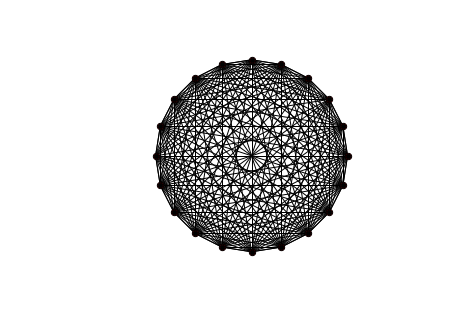

In [3]:
n = 20

from operator import itemgetter
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np
import random as r

def Kn(n):
    G = nx.Graph()
    a=range(n)
    G.add_nodes_from(a)
    Kn=[]
    for i in range(n-1):
        for j in range(n-i-1):
            k=j+i+1
            Kn.append((i,k))
    G.add_edges_from(Kn)
    return G
    
def Circular(n):
    G = nx.Graph()
    a = range(n)
    G.add_nodes_from(a)
    C = []
    for i in range(n-1):
        C.append((i,i+1))
    G.add_edges_from(C)
    G.add_edge(n-1,0)
    return(G)

##print G.nodes()
##print G.edges()
##print G.number_of_nodes()
##print G.number_of_edges()

# Complete graph (my code)
# G = Kn(12)
# could also use
# G = nx.complete_graph(12)

# E-R is number of vertices and probability (any two vertices are joined by an edge)
# G = nx.erdos_renyi_graph(40, 0.1)
# G = nx.random_regular_graph(8, 30)
G=Circular(n)
# Going for lattice stuff...
# G = nx.waxman_graph(100, 0.2)
# G = nx.grid_2d_graph(3,6,periodic=False)
# G=nx.hypercube_graph(4)
# nx.draw(G,alpha=.75)
# nx.draw(G, pos=graphviz_layout(G), node_size=1600, cmap=plt.cm.Blues, node_color=range(len(G)))
#,prog='dot')

# print nx.adjacency_matrix(G)
# print nx.laplacian_matrix(G)
# print nx.laplacian_spectrum(G)
# print nx.algebraic_connectivity(G)
# print 'Euler'
# print dir(nx)


# eCirc = nx.hamiltonian_circuit(G)
# print eCirc.next()

nx.draw_circular(G, node_color='r',node_size=40,with_labels=False)
H=G
n_attempts = 0
n_additions = 0
while not nx.is_chordal(H):
    a = r.randint(0,n-1)
    b = r.randint(0,n-1)
    n_attempts += 1
    if a != b and not H.has_edge(b, a):
        H.add_edge(a,b)
        n_additions += 1
nx.draw_circular(H, node_color='k',node_size=20)
print n_attempts, n_additions
K=nx.complete_graph(n)
print nx.is_isomorphic(H,K)
print n*(n-1)/2
print H.number_of_edges()
print H.number_of_nodes()

    


# nx.draw_random(G, node_color='r',node_size=50,with_labels=False)
# nx.draw_spectral(G, node_color='g',node_size=50,with_labels=False)
# nx.draw_shell(G, node_color='g',node_size=50,with_labels=False)


# fig, ax = plt.subplots(figsize=(12,10))
# ax.plot(px, py)

plt.axis('equal')
plt.show()

# plt.savefig("graph_name.png")




# Leech Trees

Concerning a problem in graph theory that probably does not have a solution...

Begin please by running the next cell down which sets up some necessary images.


In [3]:
!curl https://raw.githubusercontent.com/robfatland/othermathclub/master/images/graphs/graphs2_002_Leech_trees.png -o /home/nbuser/graphs2_002_Leech_trees.png -s
from PIL import Image

## Proof section

Everything from here down is about proofs, not problems.


### Leech trees


This is not a problem but rather a proof. You might read it like a story; and it concerns a kind of graph called a tree
so you may wish to brush up on trees first by reading through Book 1 Chapter 12 and Book 2 Chapter 8. 


Each edge of a tree can be assigned a *weight* which, for example a number. You could just as easily make this
number be the length of the edge between the two vertices. Normally we allow graph edges to be 'no particular
length' so this is a new thing we are adding.


Recall that trees are connected and they do not contain any cycles or loops. There is therefore one and only one 
path between any two vertices. On a weighted tree by noting the weights along a particular path we can accumulate 
a sum for that path.


The proof given here concerns a question about weighted trees called Leech trees (after the inventor). We will get
to the proof in a moment but first we should describe what a Leech tree is! Suppose there are $p$
possible paths for a tree with $n$ vertices. The first question is what is $p$? If you like you may work this 
out before continuing.


This question is equivalent to the question "Given a set of $n$ objects how many pairs of objects can be selected?"  The 
answer from combinatorics is *n choose 2* written mathematically as


$$P = \binom{n}{2} = \frac{n\cdot(n-1)}{2!}=\frac{1}{2}(n^2-n)$$


Now: If the tree is arranged in a particular way and the edges are assigned particular weights we can imagine that 
the $P$ path sums might be the numbers 1, 2, 3, 4, 5 and so on up to $P$. Such a tree is called a 
Leech tree. How many such trees are there? Only five have been found to date and this is an unsolved problem 
(as far as I can tell). Now however we know enough to read a proof concerning Leech trees. (This proof is recounted 
[here](http://www.cut-the-knot.org/arithmetic/combinatorics/LeechTrees.shtml) where I have borrowed 
their diagram of the five known Leech trees shown below.)

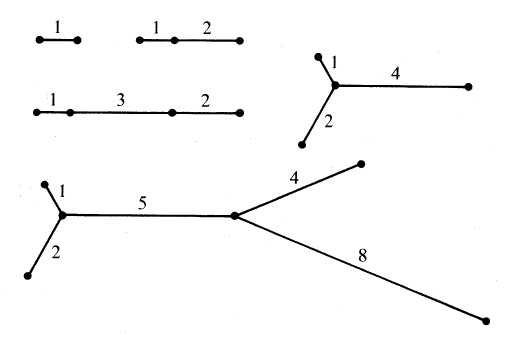

In [4]:
# Leech trees diagram: Please run this cell with Shift + Enter
!curl https://raw.githubusercontent.com/robfatland/othermathclub/master/images/graphs/graphs2_002_Leech_trees.png -o /home/nbuser/graphs2_002_Leech_trees.png -s
from PIL import Image
Image.open("/home/nbuser/graphs2_002_Leech_trees.png")

#### A Proof Concerning Leech Trees


Herbert Taylor published a proof that any Leech tree must have a number of vertices $n$ which is either a perfect 
square or a perfect square plus two. Notice that the perfect squares are 0, 1, 4, 9, 16 so that the allowed number
of vertices in a Leech tree must be one of 1, 2, 3, 4, 6, 9, 11, 16, 18, 25, 27, ... and 
so on. The proof does not establish whether such Leech trees exist; only that if they do exist then 
their number of vertices will be one of these numbers. To put it another way: It is impossible to construct
a Leech tree with 17 vertices because 17 is neither a perfect square nor a perfect square plus two.


Before going any further let's sketch out the proof so that you can try it on your own. You may begin working
on it directly without reading further of course! Or you can consider this outline as a starter kit; or you 
can simply read through the proof (which is what I did). 


- All edge weights are integers, are therefore even or odd
- About half of the $P$ paths have odd path sums
- Individual vertices can be divided into two sets A and B where...
- ...paths between an A and a B have odd path sums
- The total number of paths with odd path sums can be written in two different ways and set equal
- The remaining arithmetic shows the total number of vertices $n$ to be either...
- ...a perfect square or...
- ...a perfect square plus two...


#### A Computational Analysis of Leech Trees

Leech trees with more than six vertices may or may not exist. One question we can ask at this point is 'Can
we teach a computer to search for Leech trees?' The answer certainly 'yes' but we might be looking for a needle
in an impossibly large haystack. It would be a good idea (before writing the program) to estimate just how 
big that haystack is.


Notice that the five known Leech trees have 2, 3, 4, 4, and 6 vertices. These are all allowed numbers of vertices
so it is a relief that this is consistent with Herbert Taylor's result! Let's consider a Leech tree with 16 vertices 
since L.Szekely determined (using a computer) that there are no Leech trees with 9 or 11 vertices. How long would
it take to search all possible trees with 16 vertices? Well such a tree will have 15 edges but we can begin by
constructing a "necessary tree" of three vertices o--------o--------o. (We don't know the weights yet but
more on this in a little bit.) 


Now we have two edges so we must place 13 additional edges.
Once these edges are placed we will have path sums 1, 2, 3, 4, ..., 120 since 16 choose 2 is 120. 
One of the edge weights will have to be 1
and another will have to be 2 and a third will have to be 4. We don't have to have an edge with weight 3 because
this can be done by placing the 1 and 2 edges next to one another. But the weights must be unique so the only
way to get a path sum of 4 is to have a single edge with weight 4. We can continue to think about rules for
the weights but let's pause on that for a moment just to arrive at a first estimate of the problem size. 

After 1, 2 and 4 there remain 12 more edge weights remaining to determine.
If we use 3 and then manage use the 10 consecutive integers larger than 4: 5, 6, 7, ..., 14 then we notice that
the very last path with path sum 120 would imply 106 as a maximum edge weight. If it were any greater it would 
connect along some path to the 14-weight edge and give a path sum greater than 120, not permitted. So the
edge weights are in the range $[1, 104]$. 


Since we begin with 1, 2 and 4 and must choose 12 additional weights from the set { 3, 5, 6, 7, 8, ..., 106} 
we have $\binom{106}{12}$ which is about $2 \times 10^{15}$. Then we must distribute these
numbers across one of the myriad possible 16-vertex trees... of which there are very many configurations. 
So this problem is computationally huge. It would be nice to have some additional constraints on the numbers
we will use and the tree configuration in order to reduce the computation time to something less than 
the age of the universe. 
